# Preprocessing Data

### Dealing with categorical features
* Scikit-learn will not accept categorical features by default
* Need to encode categorical features numerically
* Convert to ‘dummy variables’
    * 0: Observation was NOT that category
    * 1: Observation was that category
    
### Dealing with categorical features in Python
* scikit-learn: OneHotEncoder()
* pandas: get_dummies()    

In [3]:
import pandas as pd
df = pd.read_csv('Auto.csv')
names=['mpg',
       'displacement',
       'horsepower',
       'weight',
       'acceleration',
       'origin']
#df = df[names] # only get the names that are in the example used
#df.dtypes
df.head()

,Model,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
0,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,American
1,amc gremlin,21.0,6,199.0,90,2648,15.0,70,American
2,amc hornet,18.0,6,199.0,97,2774,15.5,70,American
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,American
4,buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70,American


In [4]:
df_origin = pd.get_dummies(df.drop('Model', axis=1))
print(df_origin.head())

    MPG  Cylinders  Engine Disp  Horsepower  Weight  Accelerate  Year  \
0  15.0          8        390.0         190    3850         8.5    70   
1  21.0          6        199.0          90    2648        15.0    70   
2  18.0          6        199.0          97    2774        15.5    70   
3  16.0          8        304.0         150    3433        12.0    70   
4  14.0          8        455.0         225    3086        10.0    70   

   Origin_American  Origin_European  Origin_Japanese  
0                1                0                0  
1                1                0                0  
2                1                0                0  
3                1                0                0  
4                1                0                0  


We will drop the _Origin_Japanese_ column since it gives redondent information (i.e. if it's not American or European it has to be Japanese)

In [5]:
df_origin = df_origin.drop('Origin_Japanese', axis=1)
print(df_origin.head())

    MPG  Cylinders  Engine Disp  Horsepower  Weight  Accelerate  Year  \
0  15.0          8        390.0         190    3850         8.5    70   
1  21.0          6        199.0          90    2648        15.0    70   
2  18.0          6        199.0          97    2774        15.5    70   
3  16.0          8        304.0         150    3433        12.0    70   
4  14.0          8        455.0         225    3086        10.0    70   

   Origin_American  Origin_European  
0                1                0  
1                1                0  
2                1                0  
3                1                0  
4                1                0  


* mpg: Target Variable
* Origin: Categorical Feature

In [6]:
X = df_origin[['Origin_American','Origin_European']].values # features

In [7]:
y = df_origin[['MPG']].values

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train,y_train)
ridge.score(X_test, y_test)

0.23074216114950263

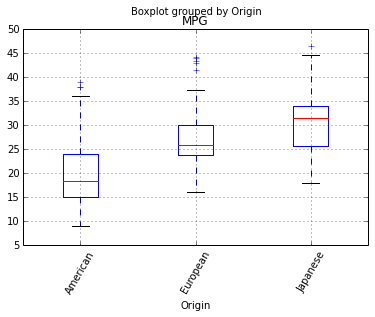

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create a boxplot of MPG per Origin
df.boxplot('MPG', 'Origin', rot=60)
# Show the plot
# plt.show()

## Handling missing data

One way is to replace the missing data on each column with, for example, a _np.nan_ using _df.insulin.replace(0, np.nan, inplace=True)_. And then dropping all the rows that have NANs using _df.dropna()_. The downside of this method is the fact that a lot of data can be dropped.

### Imputing missing data
* Making an educated guess about the missing values
    * Example: Using the mean of the non-missing entries

__Option1:__
``` python
from sklearn.preprocessing import Imputer  
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)  
imp.fit(X)  
X = imp.transform(X)  
```

__Option 2:__  
``` python
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import Imputer  
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)  
logreg = LogisticRegression()  
steps = [('imputation', imp),('logistic_regression', logreg)]  
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  
pipeline.fit(X_train, y_train)  
y_pred = pipeline.predict(X_test)  
pipeline.score(X_test, y_test)  
```

The last step on a pipeline must me an estimator (classifier or regressior).

## Exercise example

### Drop missing values
``` python
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))
```

## Centering and Scaling Data

### Why scale your data?
* Many models use some form of distance to inform them
* Features on larger scales can unduly influence the model
* Example: k-NN uses distance explicitly when making predictions
* We want features to be on a similar scale
* Normalizing (or scaling and centering)

### Ways to normalize your data
* Standardization: Subtract the mean and divide by variance
    * All features are centered around zero and have variance one
* Can also subtract the minimum and divide by the range
    * Minimum zero and maximum one
* Can also normalize so the data ranges from -1 to +1
* See scikit-learn docs for further details

``` python
from sklearn.preprocessing import scale
In [3]: X_scaled = scale(X)
In [4]: np.mean(X), np.std(X)
Out[4]: (8.13421922452, 16.7265339794)
In [5]: np.mean(X_scaled), np.std(X_scaled)
Out[5]: (2.54662653149e-15, 1.0)
```

### Scaling in a pipeline
``` python 
from sklearn.preprocessing import StandardScaler
In [7]: steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier())]
In [8]: pipeline = Pipeline(steps)
In [9]: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
In [10]: knn_scaled = pipeline.fit(X_train, y_train)
In [11]: y_pred = pipeline.predict(X_test)
In [12]: accuracy_score(y_test, y_pred)
Out[12]: 0.956
In [13]: knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
In [14]: knn_unscaled.score(X_test, y_test)
Out[14]: 0.928
```

### CV and scaling in a pipeline
``` python 
In [14]: steps = [('scaler', StandardScaler()),(('knn', KNeighborsClassifier())]
In [15]: pipeline = Pipeline(steps)
In [16]: parameters = {knn__n_neighbors=np.arange(1, 50)}
In [17]: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
In [18]: cv = GridSearchCV(pipeline, param_grid=parameters)
In [19]: cv.fit(X_train, y_train)
In [20]: y_pred = cv.predict(X_test)
In [21]: print(cv.best_params_)
In [22]: print(cv.score(X_test, y_test))
In [23]: print(classification_report(y_test, y_pred))
```